# Introduction

This is a jupyter notebook detailing the solution for data wrangling project for Udacity Data Analysis course. Here I'll demonstrate the steps taken and code run to gather, asses and clean the data.

First step is to import all necessary Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, json, re

%matplotlib inline

## Gather

We have three data sources here. The first one is already given as a file, which is the `twitter-archive-enhanced.csv` file. Let's import it into a Pandas dataframe

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

The second data source is `image_predictions.tsv` file. This should be got programtically from the provided url.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open ('image-predictions.tsv', 'wb') as imgfile:
    imgfile.write(r.content)

images = pd.read_csv('image-predictions.tsv', sep='\t')

The third data source comes from Twitter API. Since I'm short on time, I just got the provided text file. I don't need to practice APIs as I'm already a professional web scraper.
Let's just parse the text file and selectively build the tweets dataframe.

In [4]:
# initilaizing the dataframe dictionary
df_dict = {'tweet_id': [], 'retweet_count': [], 'favorite_count': []}

# parsing the text file line by line and filling up the dict
with open('tweet-json.txt', 'r') as jfile:
    for line in jfile.readlines():
        js = json.loads(line)
        df_dict['tweet_id'].append(js['id']) #getting the string id as we won't run any arithmetics on it
        df_dict['retweet_count'].append(js['retweet_count'])
        df_dict['favorite_count'].append(js['favorite_count'])

# building the dataframe
tweets = pd.DataFrame(df_dict)

## Assess

The follwoing is the representation of gathered data. This is followed by my visual and programatic assessment notes.

In [5]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Data cleanliness

__In `archive` dataframe:__
1. The `timestamp` and `retweeted_status_timestamp` columns are string.
2. Some data is missing in the `name` column.
3. Some data is missing in the 'stage' variables.
4. Missing data are listed as 'None' instead of NaN.
5. Some tweets are retweets.
6. Some tweets are just not dog ratings.
7. Name is sometimes incorrectly extracted. E.g. ("my" in index 852, "Al" in index 820)
8. Numenator is somtimes incorrectly extracted. Sometimes it's a float.
9. Sometimes the 'stage' is incorrectly extracted. The tweet sometimes uses "pupper" in a verb format like "puppaled" or "puppared". At least once, it's reported as "puppa".

__In `images` dataframe:__

10. The number of images are significantly lower than the number of tweets. We may be missing some images here.

__In `tweets` dataframe:__

11. Looks like at least two tweets are missing here.

### Data tidiness

1. The last 4 columns in the `archive` dataframe are actually variables. Should be grouped in one column called 'stage'.
2. The `archive` and `tweets` dataframes should be combined into one dataframe.
3. Perhaps "dog_breed" and "confidence_level" columns would be useful in the combined dataframe.

## Clean

### Define
1. Remove all retweets. To identify them, either their text begins with "RT" or they have a non-Null `retweeted_status_id`. **(Cleanliness issue #5)**
2. Drop all retweet-related columns. **(Cleanliness issue #5)**
2. Remove tweets that are not dog ratings. To identify them, they contain phrases like "We only rate dogs". **(Cleanliness issue #6)**
3. Another more effective way to remove tweets that are not dog ratings is by using the images data frame. Remove all tweets where `p1_dog` is `False`. **(Cleanliness issue #6)**
4. Convert all "None" values in the `name` column *only* in the `archive` to NaN. The last four columns will be dropped anyway. **(Cleanliness issue #4)**
5. Convert `timestamp` to datetime. The `retweeted_status_timestamp` is dropped by now. **(Cleanliness issue #1)**
6. Redefine the regular expression for extracting dog name. This should solve empty names and wrong names issue. **(Cleanliness issue #2 & #7)**
7. Improve the regular expression for extracting the rating. Sometimes numerator is a float. **(Cleanliness issue #8)**
8. Convert the `rating_numerator` column to float. **(Cleanliness issue #8)**
9. Create a new column in the `archive` dataframe to contain the 'stage' variable. **(Tidiness issue #1)**
10. Improve the regular expression to extract the 'stage' variable and populate the column. **(Cleanliness issue #3 & #9)**
11. Drop the `doggo`, `floofer`, `pupper` & `puppo` columns. **(Tidiness issue #1)**
11. Check to see if we're really missing some images after the above cleaning. **(Cleanliness issue #10)**
12. Check to see if we're still missing some tweets from the `tweets` dataframe. **(Cleanliness issue #11)**
14. Merge the `archive` and `tweets` dataframes. **(Tidiness issue #2)**
15. Merge the `p1` and `p1_conf` columns from the `images` dataframe into the combined dataframe. **(Tidiness issue #3)**

### Code

In [11]:
# make a copy of each dataframe first
archive_c = archive.copy()
images_c = images.copy()
tweets_c = tweets.copy()

# 1. remove retweets from the archive
archive_c = archive_c[archive_c.retweeted_status_id.isnull()]

# 2. drop all retweet related columns
archive_c.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

# 3. remove tweets that are not dog ratings based on tweet text
archive_c = archive_c[~archive_c.text.str.lower().str.contains('we only rate dogs')]

# 4. remove tweets that are not dog ratings based on image predictions
non_dog_tweets = images_c[~images_c.p1_dog]['tweet_id']
archive_c = archive_c[~archive_c.tweet_id.isin(non_dog_tweets)]

# 5. convert all "None" to NaN
archive_c[archive_c == 'None'] = np.nan

# 6. convert the timestamp into datetime
archive_c.timestamp = pd.to_datetime(archive_c.timestamp)

# 7. Redifne reg-exp for the name column to improve extraction
pat = r'((This is|Meet|Say hello to|(is|er) name is)\s[A-Z][a-z]+\s?([A-Z][a-z]+)?)'
archive_c.name = archive_c.text.str.extract(pat, expand=False)
#clear the preceeding phrases
archive_c.name = archive_c.name.str.replace('This is ', '', regex=False)
archive_c.name = archive_c.name.str.replace('Meet ', '', regex=False)
archive_c.name = archive_c.name.str.replace('Say hello to ', '', regex=False)
archive_c.name = archive_c.name.str.replace('is name is ', '', regex=False)
archive_c.name = archive_c.name.str.replace('er name is ', '', regex=False)
#strip white spaces
archive_c.name = archive_c.name.str.strip()

# 8. improve reg exp for rating
pat = r'(\d+\.?\d*?\/[1-9]\d+)'
archive_c['temp'] = archive_c.text.str.extract(pat, expand=False) #temp column to hold the whole rating
archive_c[['rating_numerator', 'rating_denominator']] = archive_c.temp.str.split(pat='/', expand=True)
archive_c.drop(columns='temp', inplace=True)

# 9. convert the numerator and denominator columns to float
archive_c['rating_numerator'] = archive_c.rating_numerator.astype('Float64')
archive_c.rating_denominator = archive_c.rating_denominator.astype('Float64')

# 10. & 11. create the stage column and populate it with the correct stage
pat = r'(doggo|floof|floofer|pupper|puppalled|puppared|puppa|puppo)'
archive_c['stage'] = archive_c.text.str.extract(pat, flags=re.IGNORECASE, expand=False).str.lower()
archive_c.stage = archive_c.stage.str.replace('floof', 'floofer')
archive_c.stage = archive_c.stage.str.replace('puppalled', 'pupper')
archive_c.stage = archive_c.stage.str.replace('puppared', 'pupper')
archive_c.stage = archive_c.stage.str.replace('puppa', 'pupper')
archive_c.info()

# 12. drop the dog stage columns
archive_c.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1614 non-null   int64              
 1   in_reply_to_status_id  68 non-null     float64            
 2   in_reply_to_user_id    68 non-null     float64            
 3   timestamp              1614 non-null   datetime64[ns, UTC]
 4   source                 1614 non-null   object             
 5   text                   1614 non-null   object             
 6   expanded_urls          1556 non-null   object             
 7   rating_numerator       1613 non-null   float64            
 8   rating_denominator     1613 non-null   float64            
 9   name                   1083 non-null   object             
 10  doggo                  71 non-null     object             
 11  floofer                10 non-null     object           

In [12]:
# 13. do we really have missing images?
tweets_with_img = archive_c[archive_c.expanded_urls.str.contains('/photo/', na=False)]['tweet_id']
#is any of those tweets missing from the images data frame? if there are missing tweets, nothing we can do about it
len(images_c[~images_c.tweet_id.isin(tweets_with_img)])

690

We're missing a lot of images here. We wouldn't have dog breed values for 690 tweets in the final dataset

In [13]:
# 13. do we still have tweets missing from the twitter API dataframe?
len(archive_c[~archive_c.tweet_id.isin(tweets_c.tweet_id)])

0

Great! All tweets in the cleaned archive are retrieved in the tweets from the API. The apprently missing ones must have been cleaned in the above cleaning process

In [14]:
# 15. merge the archive and tweets dataframes
df = pd.merge(archive_c, tweets_c, how='left', on='tweet_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1614 non-null   int64              
 1   in_reply_to_status_id  68 non-null     float64            
 2   in_reply_to_user_id    68 non-null     float64            
 3   timestamp              1614 non-null   datetime64[ns, UTC]
 4   source                 1614 non-null   object             
 5   text                   1614 non-null   object             
 6   expanded_urls          1556 non-null   object             
 7   rating_numerator       1613 non-null   float64            
 8   rating_denominator     1613 non-null   float64            
 9   name                   1083 non-null   object             
 10  stage                  320 non-null    object             
 11  retweet_count          1614 non-null   int64            

In [15]:
# 16. merge the p1 and p1_conf columns from the images dataframe into the combined dataframe
df = pd.merge(df, images_c[['tweet_id', 'p1', 'p1_conf']], how='left', on='tweet_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1614 non-null   int64              
 1   in_reply_to_status_id  68 non-null     float64            
 2   in_reply_to_user_id    68 non-null     float64            
 3   timestamp              1614 non-null   datetime64[ns, UTC]
 4   source                 1614 non-null   object             
 5   text                   1614 non-null   object             
 6   expanded_urls          1556 non-null   object             
 7   rating_numerator       1613 non-null   float64            
 8   rating_denominator     1613 non-null   float64            
 9   name                   1083 non-null   object             
 10  stage                  320 non-null    object             
 11  retweet_count          1614 non-null   int64            

In [16]:
# rename the dog breed columns to more meaningful names
df.rename(columns={'p1': 'dog_breed', 'p1_conf': 'confidence'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1614 non-null   int64              
 1   in_reply_to_status_id  68 non-null     float64            
 2   in_reply_to_user_id    68 non-null     float64            
 3   timestamp              1614 non-null   datetime64[ns, UTC]
 4   source                 1614 non-null   object             
 5   text                   1614 non-null   object             
 6   expanded_urls          1556 non-null   object             
 7   rating_numerator       1613 non-null   float64            
 8   rating_denominator     1613 non-null   float64            
 9   name                   1083 non-null   object             
 10  stage                  320 non-null    object             
 11  retweet_count          1614 non-null   int64            

### Test

Judging by the above printout of the df.info(), the following improvements are confirmed:
- All needed data are now in one concise well-formated dataset.
- The `timestamp` column dtype is corrected.
- The `rating_numerator` is now a float

Previously, we had wrong dog names. Is the situation improved?

In [17]:
wrong_name_tweets = archive[archive.name.isin(['a', 'very', 'just'])]['tweet_id'] #just for example of incorrect names
df[df.tweet_id.isin(wrong_name_tweets)][['text', 'name']]

,text,name
47,Here is a pupper approaching maximum borkdrive...,NaN
656,This is a mighty rare blue-tailed hammer sherk...,NaN
658,Viewer discretion is advised. This is a terrib...,NaN
688,This is a very rare Great Alaskan Bush Pupper....,NaN
698,This is just downright precious af. 12/10 for ...,NaN
907,Here is a heartbreaking scene of an incredible...,NaN
914,Here is a whole flock of puppers. 60/50 I'll ...,NaN
920,This is a Butternut Cumberfloof. It's not wind...,NaN
925,This is a Wild Tuscan Poofwiggle. Careful not ...,NaN
938,"""Pupper is a present to world. Here is a bow f...",NaN


OOPs! That's a lot of NaN's. Let's improve that again

In [18]:
# redifne reg-exp for the name column to improve extraction
pat = r'((This is|Meet|Say hello to|(is|er) name is|named)\s[A-Z][a-z]+\s?([A-Z][a-z]+)?)'
df.name = df.text.str.extract(pat, expand=False)
#clear the preceeding phrases
df.name = df.name.str.replace('This is ', '', regex=False)
df.name = df.name.str.replace('Meet ', '', regex=False)
df.name = df.name.str.replace('Say hello to ', '', regex=False)
df.name = df.name.str.replace('is name is ', '', regex=False)
df.name = df.name.str.replace('er name is ', '', regex=False)
df.name = df.name.str.replace('named ', '', regex=False)
#strip white spaces
df.name = df.name.str.strip()

df[df.tweet_id.isin(wrong_name_tweets)][['text', 'name']]

,text,name
47,Here is a pupper approaching maximum borkdrive...,NaN
656,This is a mighty rare blue-tailed hammer sherk...,NaN
658,Viewer discretion is advised. This is a terrib...,NaN
688,This is a very rare Great Alaskan Bush Pupper....,NaN
698,This is just downright precious af. 12/10 for ...,NaN
907,Here is a heartbreaking scene of an incredible...,NaN
914,Here is a whole flock of puppers. 60/50 I'll ...,NaN
920,This is a Butternut Cumberfloof. It's not wind...,NaN
925,This is a Wild Tuscan Poofwiggle. Careful not ...,NaN
938,"""Pupper is a present to world. Here is a bow f...",NaN


Much better!

Previously, we had a lot of unextracted stage varible. Has the situation improved?

In [19]:
old_nans = archive.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"')['tweet_id']
df[df.tweet_id.isin(old_nans) & df.stage.notnull()]['stage']

40       pupper
44      floofer
45       pupper
65        doggo
67        puppo
82        puppo
100       puppo
157       puppo
188       puppo
202       puppo
265      pupper
289     floofer
292      pupper
313       doggo
356      pupper
360       puppo
401     floofer
405     floofer
479     floofer
510     floofer
610       doggo
621     floofer
626     floofer
655     floofer
674      pupper
768     floofer
771     floofer
779     floofer
814      pupper
821      pupper
823     floofer
835      pupper
846     floofer
847     floofer
911     floofer
914      pupper
920     floofer
930     floofer
964     floofer
1005    floofer
1029    floofer
1044     pupper
1045    floofer
1059    floofer
1103    floofer
1131     pupper
1132     pupper
1138     pupper
1187     pupper
1205     pupper
1265     pupper
1277     pupper
1281     pupper
1293     pupper
Name: stage, dtype: object

Much much better!

Let's save the dataset to file now.

In [20]:
df.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis

In [21]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence
count,1.614000e+03,6.800000e+01,6.800000e+01,1613.000000,1613.000000,1614.000000,1614.000000,1433.000000
mean,7.411359e+17,7.518835e+17,2.310372e+16,12.290936,10.509609,2725.578686,8864.768897,0.613561
std,6.826973e+16,7.836243e+16,1.340451e+17,21.003605,6.558720,4702.507402,12260.286403,0.261200
min,6.660209e+17,6.658147e+17,1.185634e+07,1.000000,10.000000,0.000000,52.000000,0.044333
25%,6.789941e+17,6.764027e+17,1.909316e+08,10.000000,10.000000,607.000000,2046.000000,0.388332
50%,7.156888e+17,7.205448e+17,4.196984e+09,11.000000,10.000000,1378.500000,4226.000000,0.614231
75%,7.954483e+17,8.328772e+17,4.196984e+09,12.000000,10.000000,3206.250000,11206.000000,0.854861
max,8.921774e+17,8.862664e+17,8.405479e+17,666.000000,150.000000,79515.000000,132810.000000,0.999956


### Insight 1
Let's find out which are the top 5 favorite dog breed by people who saw the tweets.
To do this, let's groupby the `dog_breed` and get the top 5 based on both `favorite_count` and `retweet_count`.

In [22]:
grouped = df.groupby('dog_breed').sum()[['favorite_count', 'retweet_count']]
grouped.sort_values(by=['favorite_count', 'retweet_count'], ascending=False, inplace=True)
grouped.head()

,favorite_count,retweet_count
dog_breed,,
golden_retriever,1668261.0,494931.0
Labrador_retriever,1015922.0,323951.0
Pembroke,960900.0,272440.0
Chihuahua,644051.0,212291.0
French_bulldog,447417.0,117874.0


Great! now we know which are the most popluar dogs by people who encounterd the @WeRateDogs account tweets.

### Insight 2
Let's find out if the most favorite dog breed changed over the years.
To do this, let's create a new column `year` based on the tweet `timestamp`. Then we groupby the year and get the most favorite dog breed for each year.

In [23]:
df['year'] = df.timestamp.dt.year
grouped = df.groupby(['year', 'dog_breed']).sum(numeric_only=True)[['favorite_count', 'retweet_count']]
grouped.sort_values(by=['favorite_count', 'retweet_count'], ascending=False, inplace=True)
#grouped.groupby('year').head(1).sort_values(by=['year', 'favorite_count', 'retweet_count'], ascending=False)
grouped.groupby('year').head(1).sort_values(by=['year'], ascending=True)

,,favorite_count,retweet_count
year,dog_breed,,
2015,toy_poodle,115640.0,51092.0
2016,golden_retriever,816529.0,286331.0
2017,golden_retriever,791714.0,184659.0


OK! So the toy poodles were the most favorite in 2015 but golden retrievers took over in 2016 and held to their lead in 2017. Good for you golden ones!

### Insight 3
Let's find out what is the top 5 most popular name for dogs among the account followers

In [24]:
df.name.value_counts().head()

Cooper     10
Charlie    10
Lucy        9
Oliver      9
Tucker      8
Name: name, dtype: int64

If you meet a dog, there's a high chance if you call "Charlie" or "Cooper", he'll probably look your way.

### Visualizations
Let's see which dog breed is favorited by the @WeRateDogs people themselves. I know that "They are all good dogs, Brent", but how likely a certain dog breed would get a high rating.
We'll need to make a new column with the whole rating by deviding the numerator by the denominator.

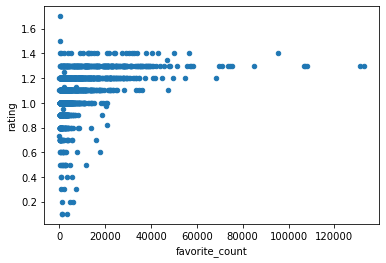

In [25]:
df['rating'] = df.rating_numerator / df.rating_denominator
df[df.rating < 15].plot(x='favorite_count', y='rating', kind='scatter'); # filtered for less than 15 to remove outliers

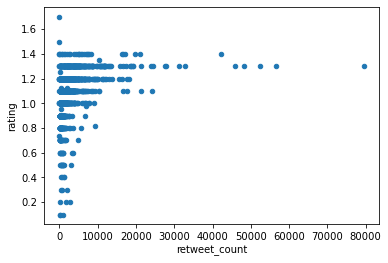

In [26]:
df[df.rating < 15].plot(x='retweet_count', y='rating', kind='scatter'); # filtered for less than 15 to remove outliers

Looks like retweeting and favouriting tend to increase as rating increases. The @WeRateDogs people seems to be in sync with the public.

Now, let's look at which dog stage gets rated higher in average.

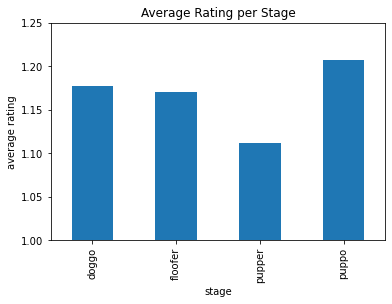

In [27]:
df.groupby('stage').mean()['rating'].plot(x='stage', y='rating', kind='bar', ylim=(1, 1.25),
                                          title="Average Rating per Stage", ylabel='average rating');

Looks like the puppos are the favorites.

Now, let's see how our top five favorite dogs popularity changed across time.

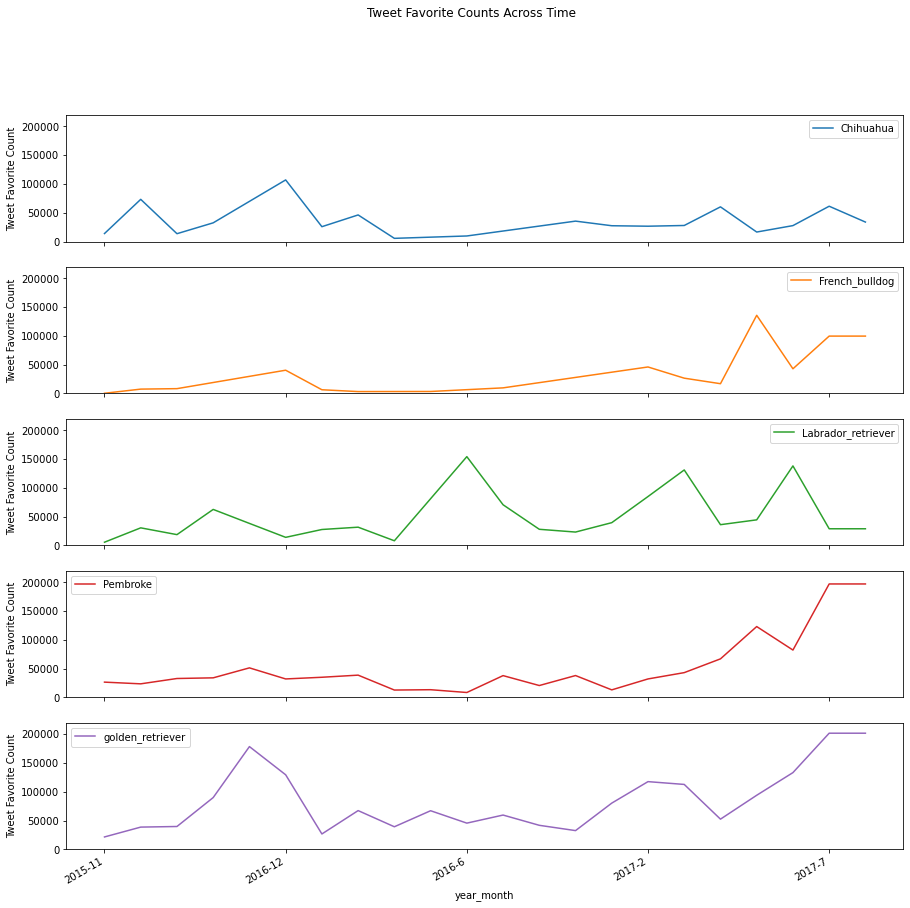

In [28]:
df['year_month'] = df.year.map(str) + "-" + df.timestamp.dt.month.map(str)
favs = ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'French_bulldog']
grouped = df[df.dog_breed.isin(favs)].groupby(['year_month', 'dog_breed']).sum()
grouped.sort_values(by='year_month', ascending=True, inplace=True)
grouped.unstack('dog_breed').interpolate().plot(y='favorite_count', kind='line', figsize=(15, 15),
                                               title='Tweet Favorite Counts Across Time',
                                               ylabel='Tweet Favorite Count', subplots=True,
                                               ylim=(0, 220000));

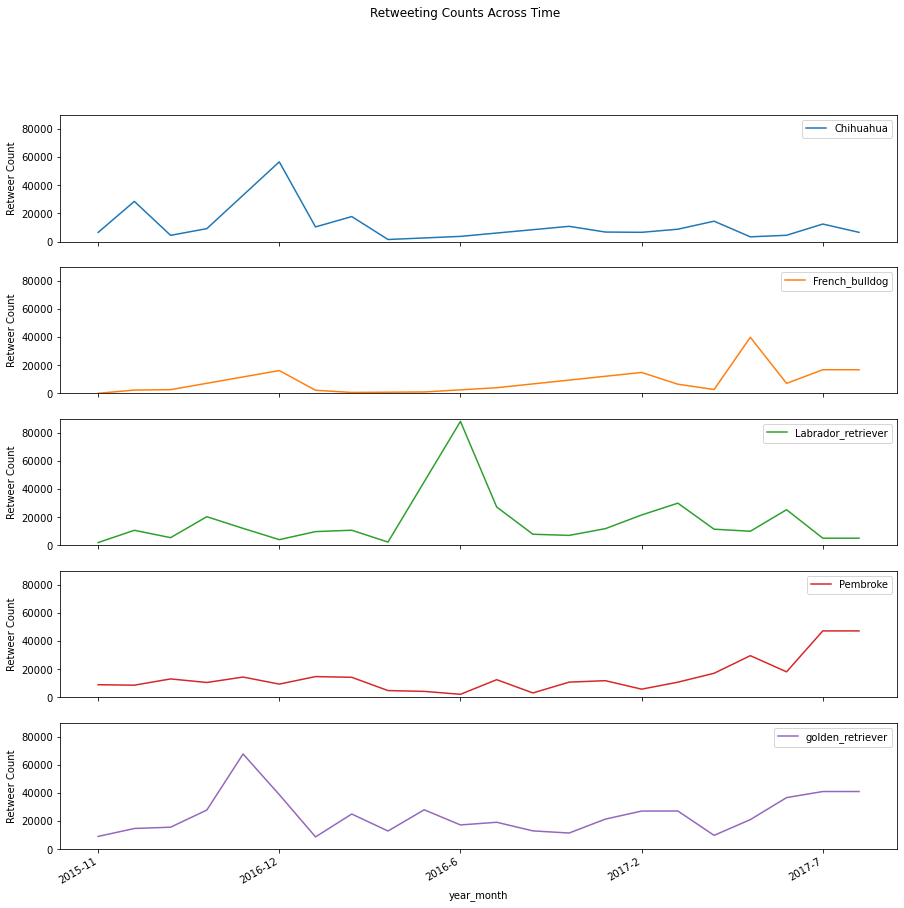

In [29]:
grouped.unstack('dog_breed').interpolate().plot(y='retweet_count', kind='line', figsize=(15, 15),
                                               title='Retweeting Counts Across Time',
                                               ylabel='Retweer Count', subplots=True,
                                               ylim=(0, 90000));